In [1]:
import circuits_4q
import csv
import matplotlib.pyplot as plt
import numpy as np

circuits = circuits_4q.circuits

filename = "4q-1000samples.csv"

data_expr = {}
data_ent = {}
data_num_parameters = {}
data_num_2q_gates = {}
data_depth = {}
data_labels = {}

with open(filename, 'r') as file:
    csv_reader = csv.reader(file)

    # Use a counter to track the current line number
    line_count = 0

    # Loop through the rows in the CSV file
    for row in csv_reader:
        line_count += 1
        if line_count <= 3:
            continue

        id = row[0].partition("-")[0]
        L = int(row[1])
        expr = float(row[2])
        ent = float(row[3])
        t = float(row[4])

        num_par = L*circuits[int(id)-1].num_parameters
        num_2q_gates = L*circuits[int(id)-1].num_2q_gates
        depth = L*circuits[int(id)-1].depth


        data_expr[L] = data_expr.get(L, {})
        data_expr[L][id] = expr

        data_ent[L] = data_ent.get(L, {})
        data_ent[L][id] = ent

        data_num_parameters[L] = data_num_parameters.get(L, {})
        data_num_parameters[L][id] = num_par

        data_num_2q_gates[L] = data_num_2q_gates.get(L, {})
        data_num_2q_gates[L][id] = num_2q_gates

        data_depth[L] = data_depth.get(L, {})
        data_depth[L][id] = depth

        data_labels[L] = data_labels.get(L, {})
        data_labels[L][id] = f"{id} ({L} layers)"
        

In [8]:
L_max = len(data_expr.keys())

num_par = []
num_2q_gates = []
depth = []
expr = []
ent = []
labels = []

connectivity = {'none': ['1',], 'linear': ['2','3','4','7','8','9','11','12','16','17'], 'ring': ['10','13','14','15','18','19'], 'all-to-all': ['5', '6']}


for L in range(1,L_max+1):
    for id in data_expr[L].keys():
        num_par.append(data_num_parameters[L][id])
        num_2q_gates.append(data_num_2q_gates[L][id])
        depth.append(data_depth[L][id])
        expr.append(data_expr[L][id])
        ent.append(data_ent[L][id])
        labels.append(data_labels[L][id])

[[1.         0.79265037 0.86888958]
 [0.79265037 1.         0.98034603]
 [0.86888958 0.98034603 1.        ]]


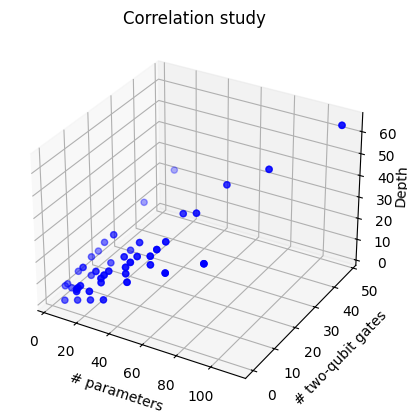

In [28]:
# Correlations
#from mpl_toolkits.mplot3d import Axes3D

correlation_matrix  = np.corrcoef([num_par, num_2q_gates, depth])
print(correlation_matrix)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(num_par, num_2q_gates, depth, c='b', marker='o')
ax.set_xlabel('# parameters')
ax.set_ylabel('# two-qubit gates')
ax.set_zlabel('Depth')
ax.zaxis.labelpad=-2


plt.title('Correlation study')
plt.show()

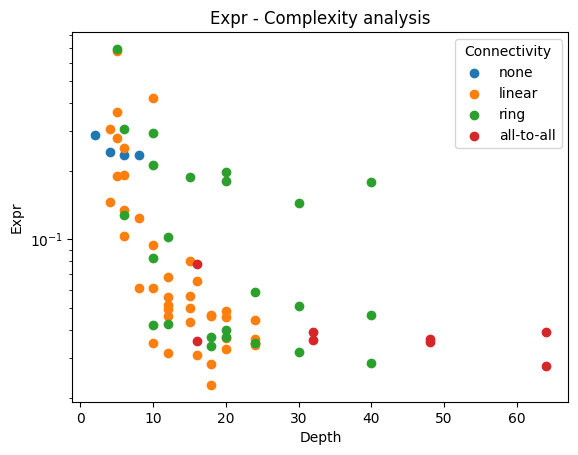

In [9]:
# expressibility

for con in connectivity.keys():
    x = []
    y = []
    for L in range(1, L_max+1):
        for id in connectivity[con]:
            x.append(data_depth[L][id])
            y.append(data_expr[L][id])
    plt.scatter(x,y, label=con)

plt.xlabel('Depth')
plt.ylabel('Expr')
plt.yscale('log')
plt.title('Expr - Complexity analysis')
plt.legend(title='Connectivity')
plt.show()

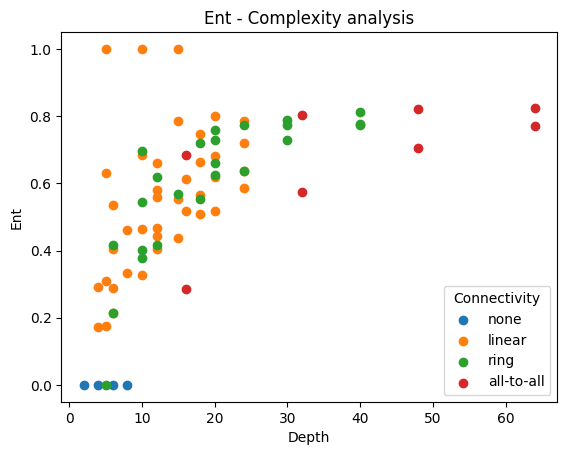

In [10]:
# entangling capability

for con in connectivity.keys():
    x = []
    y = []
    for L in range(1, L_max+1):
        for id in connectivity[con]:
            x.append(data_depth[L][id])
            y.append(data_ent[L][id])
    plt.scatter(x,y, label=con)

plt.xlabel('Depth')
plt.ylabel('Ent')
plt.title('Ent - Complexity analysis')
plt.legend(title='Connectivity')
plt.show()

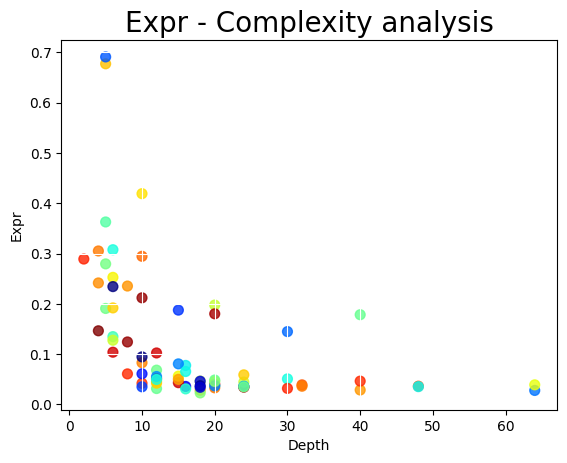

In [31]:
import mpld3

fig, ax = plt.subplots()

scatter = ax.scatter(depth,
                     expr,
                     c=np.random.random(size=len(depth)),
                     s=50,
                     alpha=0.8,
                     cmap=plt.cm.jet)
ax.grid(color='white', linestyle='solid')

ax.set_title("Expr - Complexity analysis", size=20)
ax.set_xlabel("Depth")
ax.set_ylabel("Expr")

tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.enable_notebook()
mpld3.save_html(fig, "expr-depth.html")

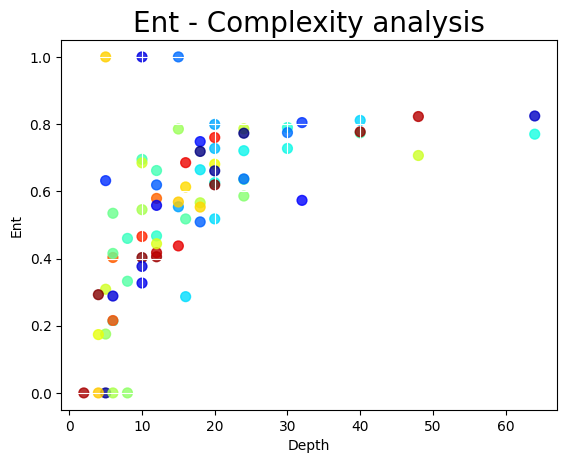

In [32]:
fig, ax = plt.subplots()

scatter = ax.scatter(depth,
                     ent,
                     c=np.random.random(size=len(depth)),
                     s=50,
                     alpha=0.8,
                     cmap=plt.cm.jet)
ax.grid(color='white', linestyle='solid')

ax.set_title("Ent - Complexity analysis", size=20)
ax.set_xlabel("Depth")
ax.set_ylabel("Ent")

tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.enable_notebook()
mpld3.save_html(fig, "ent-depth.html")